In [2]:
from functions import *
import params
import os

## Set up paths and parameters

In [3]:
path = os.getcwd() + '/'
bands = params.bands
output_path = params.output_path
output_name = params.output_name
temp_path = params.temp_path

spectral_path = params.spectral_path
spectral_names = params.spectral_names
path_to_tile_run = params.path_to_tile_run
spectral_surveys = params.spectral_surveys
vignet = params.vignet
    

cat = MakeCatalogs('ps3pi_cfis', bands, temp_path, output_name, output_path)

## Read input catalogue(s)

In [10]:
df_matched = pd.read_csv('CFIS_matched_deep_2_3_catalog_R_preprocessed.csv')
df_matched = df_matched.dropna()

FileNotFoundError: [Errno 2] No such file or directory: 'CFIS_matched_deep_2_3_catalog_R_preprocessed.csv'

## Plot magnitudes

In [9]:
print(df_matched)

NameError: name 'df_matched' is not defined

In [ ]:
df_unmatched = pd.read_csv('MediumDeep_IZG_CFHT_U_CFIS_R_catalog_unmatched.csv')

In [7]:
n = 100

column = 'r'

udensity, ubins_edge = np.histogram(df_unmatched[column].values, bins=n, density=True)
ubin_min = ubins_edge[0]
ubin_max = ubins_edge[-1]
ustep = (ubin_max - ubin_min)/n

density, bins_edge = np.histogram(df_matched[column].values, bins=n, density=True)
bin_min = bins_edge[0]
bin_max = bins_edge[-1]
step = (bin_max - bin_min)/n

ID = np.arange(0, len(df_matched))
df_matched.insert(loc=0, value=ID, column='ID')
df_matched.sort_values(by=column, inplace=True)

weights, uweights = [], []
n_min = 0
n_umin = 0
h1, h2 = [], []
for i in range(len(df_matched)):
    for k in range(n_min, n):
        if bin_min+step*(k+1) < df_matched[column].values[i]:
            continue
        else:
            weights.append(density[k])
            n_min = k
            h1.append(df_matched[column].values[i])
            break 
        

    for k in range(n_umin, n):
        if ubin_min+ustep*(k+1) < df_matched[column].values[i]:
            continue
        else:
            uweights.append(udensity[k])
            n_umin = k
            h2.append(df_matched[column].values[i])
            break 
        


w = np.array(uweights) / np.array(weights)



fig =plt.figure(figsize=(8,6), tight_layout=False)

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax2.twiny()
ax1.get_shared_x_axes().join(ax2, ax3)
ax2.grid(False)
ax3.grid(False)
ax2.set_ylabel('Normalized distribution', fontsize=20)

ax1.set_facecolor('white')
ax1.grid(True, color='grey', lw=0.5)
ax1.set_xlabel('Magnitude (' + r'$r$' + ' band)', fontsize=20)
ax1.set_ylabel('Relative weight', fontsize=20)

ax1.plot(df_matched[column].to_numpy(), w, label='Relative weight '+ r'$\omega$')
ax1.axhline(1, color='k', linestyle='--')

ax2.plot(h1, np.array(weights), color='grey', alpha=0.8, label='Matched R band distribution '+r'$\omega_{m}$')
ax3.fill_between(h1, np.array(weights), color='grey', alpha=0.5)

ax2.plot(h2, np.array(uweights), color='k', alpha=0.8, label='Unmatched R band distribution '+r'$\omega_{u}$')
ax3.fill_between(h2, np.array(uweights), color='grey', alpha=0.5)

legend = ax2.legend(loc='upper left', shadow=True, fontsize='x-large')
legend = ax1.legend(loc=(0.02,0.7), shadow=True, fontsize='x-large')

# order
ax3.zorder = 1 # fills in back
ax1.zorder = 2 # then the line
ax2.zorder = 3 # then the points
ax1.patch.set_visible(False)

# plt.savefig('output/' + 'ps3pi_cfis' + '/CFIS_matched_deep_2_3_catalog_R' + '/figures/' + 'weight_distribution' + '.pdf', bbox_inches='tight', transparent=True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'CFIS_matched_deep_2_3_catalog_R_preprocessed.csv'

In [ ]:
df_matched = pd.read_csv('output/' + 'ps3pi_cfis' + '/CFIS_matched_deep_2_3_catalog_R' + '/files/' + 'CFIS_matched_deep_2_3_catalog_R_preprocessed' + '.csv')
df_matched = df_matched.dropna()
df_unmatched = pd.read_csv('output/' + 'ps3pi_cfis' + '/CFIS_matched_deep_2_3_catalog_R' + '/files/' + 'MediumDeep_IZG_CFHT_U_CFIS_R_catalog_unmatched' + '.csv')

n = 100

column = 'i'

udensity, ubins_edge = np.histogram(df_unmatched[column].values, bins=n, density=True)
ubin_min = ubins_edge[0]
ubin_max = ubins_edge[-1]
ustep = (ubin_max - ubin_min)/n

density, bins_edge = np.histogram(df_matched[column].values, bins=n, density=True)
bin_min = bins_edge[0]
bin_max = bins_edge[-1]
step = (bin_max - bin_min)/n

ID = np.arange(0, len(df_matched))
df_matched.insert(loc=0, value=ID, column='ID')
df_matched.sort_values(by=column, inplace=True)

weights, uweights = [], []
n_min = 0
n_umin = 0
h1, h2 = [], []
for i in range(len(df_matched)):
    for k in range(n_min, n):
        if bin_min+step*(k+1) < df_matched[column].values[i]:
            continue
        else:
            weights.append(density[k])
            n_min = k
            h1.append(df_matched[column].values[i])
            break 
        

    for k in range(n_umin, n):
        if ubin_min+ustep*(k+1) < df_matched[column].values[i]:
            continue
        else:
            uweights.append(udensity[k])
            n_umin = k
            h2.append(df_matched[column].values[i])
            break 
        


w = np.array(uweights) / np.array(weights)



fig =plt.figure(figsize=(8,6), tight_layout=False)

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax2.twiny()
ax1.get_shared_x_axes().join(ax2, ax3)
ax2.grid(False)
ax3.grid(False)
ax2.set_ylabel('Normalized distribution', fontsize=20)

ax1.set_facecolor('white')
ax1.grid(True, color='grey', lw=0.5)
ax1.set_xlabel('Magnitude (' + r'$r$' + ' band)', fontsize=20)
ax1.set_ylabel('Relative weight', fontsize=20)

ax1.plot(df_matched[column].to_numpy(), w, label='Relative weight '+ r'$\omega$')
ax1.axhline(1, color='k', linestyle='--')

ax2.plot(h1, np.array(weights), color='grey', alpha=0.8, label='Matched R band distribution '+r'$\omega_{m}$')
ax3.fill_between(h1, np.array(weights), color='grey', alpha=0.5)

ax2.plot(h2, np.array(uweights), color='k', alpha=0.8, label='Unmatched R band distribution '+r'$\omega_{u}$')
ax3.fill_between(h2, np.array(uweights), color='grey', alpha=0.5)

legend = ax2.legend(loc='upper left', shadow=True, fontsize='x-large')
legend = ax1.legend(loc=(0.02,0.7), shadow=True, fontsize='x-large')

# order
ax3.zorder = 1 # fills in back
ax1.zorder = 2 # then the line
ax2.zorder = 3 # then the points
ax1.patch.set_visible(False)

# plt.savefig('output/' + 'ps3pi_cfis' + '/CFIS_matched_deep_2_3_catalog_R' + '/figures/' + 'weight_distribution' + '.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [3]:
path = os.getcwd() + '/'

RF = pd.read_csv(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/files/ML/' + 'RF_prediction_CFIS_matched_deep_2_3_catalog_R' + '.csv')
y_pred_rf = RF.iloc[:, 0].values
y_test_rf = RF.iloc[:, 1].values
XGb = pd.read_csv(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/files/ML/' + 'XGB_prediction_CFIS_matched_deep_2_3_catalog_R' + '.csv')
y_pred_xgb = XGb.iloc[:, 0].values
y_test_xgb = XGb.iloc[:, 1].values
ANN = pd.read_csv(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/files/ML/' + 'ANN_prediction_CFIS_matched_deep_2_3_catalog_R' + '.csv')
y_pred_ann = ANN.iloc[:, 0].values
y_test_ann = ANN.iloc[:, 1].values
SVR = pd.read_csv(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/files/ML/' + 'SVR_prediction_CFIS_matched_deep_2_3_catalog_R' + '.csv')
y_pred_svr = SVR.iloc[:, 0].values
y_test_svr = SVR.iloc[:, 1].values
LePhare = pd.read_csv(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/files/ML/' + 'LePhare_z_spec_zphot_med-cfht-cfisr_giruz' + '.csv')
y_pred_lp = LePhare.iloc[:, 0].values
y_test_lp = LePhare.iloc[:, 1].values

y_pred = [ y_pred_svr, y_pred_rf, y_pred_ann, y_pred_xgb, y_pred_lp]
y_test = [y_test_svr, y_test_rf, y_test_ann, y_test_xgb , y_test_lp]

#----------------------------------------------------------------------------------------------------------------------------------------#

def sigma_eta(y_test, y_pred):
  delta_z = (y_test - y_pred)/(np.ones_like(y_test) + y_test)
  sigma = 1.4826*np.median( np.abs( delta_z - np.median(delta_z) ) )
  outlier = np.abs(delta_z) > 0.15
  outlier_rate = len([x for x in outlier.ravel() if x==True])/len(delta_z.ravel())
  return sigma, outlier_rate

def sigma_eta_score(y_test, y_pred):
  delta_z = (y_test - y_pred)/(np.ones_like(y_test) + y_test)
  sigma = 1.4826*np.median( np.abs( delta_z - np.median(delta_z) ) )
  outlier = np.abs(delta_z) > 0.15
  outlier_rate = len([x for x in outlier.ravel() if x==True])/len(delta_z.ravel())
  return np.sqrt(sigma**2 + np.mean(delta_z)**2)


s = sigma_eta_score(y_test_lp, y_pred_lp)
print(s)
#----------------------------------------------------------------------------------------------------------------------------------------#

MLM = ['Support Vector Regression', 'Random Forest', 'Artificial Neural Network', 'XGBoost', 'LePhare']

lim = 1.8
fig =plt.figure(figsize=(24,16), tight_layout=False)

for i in range(1,len(MLM)+1):
    ax = fig.add_subplot(230+i)
    ax.set_facecolor('white')
    ax.grid(True, color='grey', lw=0.5)
    ax.set_xlabel(r'$\mathrm{z}_{\mathrm{spec}}$', size=25)
    ax.set_ylabel(r'$\mathrm{z}_{\mathrm{phot}}$', size=25)

    ax.set_title('%s'%MLM[i-1], size=20)
    im = ax.hist2d([float(y) for y in y_test[i-1]], [float(y) for y in y_pred[i-1]], bins=(50, 50), cmap='Blues')
    ax.set_xlim([0, lim])
    ax.set_ylim([0, lim])
    cbar = fig.colorbar(im[3])

  

    # sigma, outlier_rate = sigma_eta(y_test[i-1], y_pred[i-1])
    # ax.text(0.1,lim-0.2,r'$\sigma = {:.3f}$'.format(sigma)+'\n'+r'$\eta = {:.2f}$ %'.format(outlier_rate*100), size=15,va="baseline", ha="left", multialignment="left")


    x = np.linspace(0, 3.5, 1000)
    ax.plot(x,x, linewidth=1, color='k', linestyle='--')


# plt.savefig(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/figures/' +'MLM_comparison' +'.pdf', bbox_inches='tight', transparent=True)
plt.show()

0.160744860657462


ValueError: autodetected range of [nan, nan] is not finite

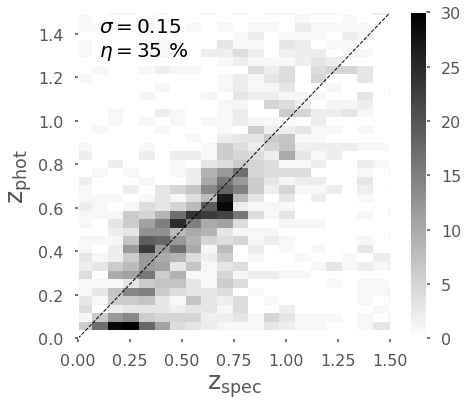

In [3]:
path = os.getcwd() + '/'

RF = pd.read_csv(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/files/ML/' + 'RF_Opt_prediction_CFIS_matched_deep_2_3_catalog_R' + '.csv')
LePhare = pd.read_csv(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/files/ML/' + 'LePhare_z_spec_zphot_med-cfht-cfisr_giruz' + '.csv')

y_pred = LePhare.iloc[:, 1].values
y_test = LePhare.iloc[:, 0].values

lim = 1.5


fig =plt.figure(figsize=(7,6), tight_layout=False)

ax = fig.add_subplot(111)
ax.set_facecolor('white')
ax.grid(True, color='grey', lw=0.5)
ax.set_xlabel(r'$\mathrm{z}_{\mathrm{spec}}$', size=25)
ax.set_ylabel(r'$\mathrm{z}_{\mathrm{phot}}$', size=25)

im = ax.hist2d([float(y) for y in y_test], [float(y) for y in y_pred], bins=(50, 50), cmap='gist_yarg')
ax.set_xlim([0, lim])
ax.set_ylim([0, lim])

cbar = fig.colorbar(im[3])

sigma, outlier_rate = sigma_eta(y_test, y_pred)

ax.text(0.1,lim-0.2,r'$\sigma = {:.2f}$'.format(sigma)+'\n'+r'$\eta = {:.0f}$ %'.format(outlier_rate*100), size=20,va="baseline", ha="left", multialignment="left")


x = np.linspace(0, 3.5, 1000)
ax.plot(x,x, linewidth=1, color='k', linestyle='--')


plt.savefig(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/figures/' +'LePhare_prediction_CFIS_matched_deep_2_3_catalog_R' +'.pdf', bbox_inches='tight', transparent=True)
plt.show()

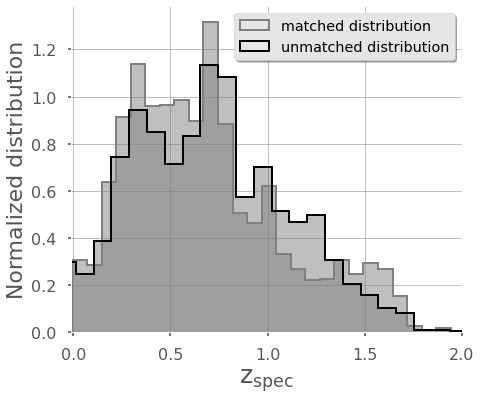

In [3]:
path = os.getcwd() + '/'

z_matched = pd.read_csv(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/files/' + 'MediumDeep_IZG_CFHT_U_CFIS_R_catalog' + '.csv')
z_unmatched = fits.open(path + 'catalogs/' + 'alldeep.egs.uniq.2012jun13' + '.fits')


fig =plt.figure(figsize=(7,6), tight_layout=False)

ax = fig.add_subplot(111)
ax.set_facecolor('white')
ax.grid(True, color='grey', lw=0.5)
ax.set_xlabel(r'$\mathrm{z}_{\mathrm{spec}}$', size=25)
ax.set_ylabel('Normalized distribution', size=22)

ax.set_xlim(-0.01,2)

mbins, mdensity, _ = ax.hist(z_matched['Z spec'], bins=50, color='grey', alpha=1, density=True, histtype='step', lw=2, label='matched distribution')
ax.hist(z_matched['Z spec'], bins=50, color='grey', alpha=0.5, density=True)
ubins, udensity, _ = ax.hist(z_unmatched[1].data['z'], bins=50, color='k', density=True, histtype='step', lw=2, label='unmatched distribution')
ax.hist(z_unmatched[1].data['z'], bins=50, color='grey', alpha=0.5, density=True)

legend = ax.legend(loc='best', shadow=True, fontsize='x-large')


plt.savefig(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/figures/' +'Z_distribution_matched_unmatched' +'.pdf', bbox_inches='tight', transparent=True)
plt.show()


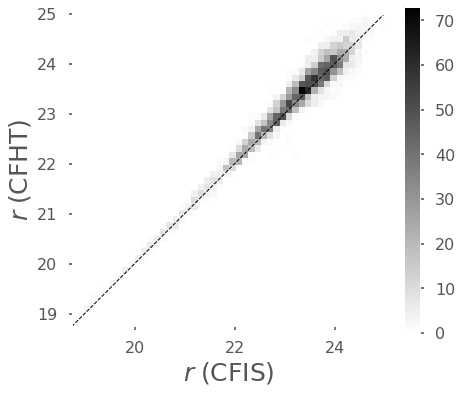

In [3]:
path = os.getcwd() + '/'

CFHT_CFIS = pd.read_csv(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/files/' + 'R_CFHT_vs_CFIS' + '.csv')
CFHT_CFIS = CFHT_CFIS.dropna()

MAG_r = CFHT_CFIS['MAG_r'].values
MAG_AUTO_R = CFHT_CFIS['MAG_AUTO_R'].values

lim = 1.5

fig =plt.figure(figsize=(7,6), tight_layout=False)

ax = fig.add_subplot(111)
ax.set_facecolor('white')
ax.grid(True, color='grey', lw=0.5)
ax.set_ylabel(r'$r\; (\mathrm{CFHT})$', size=25)
ax.set_xlabel(r'$r\; (\mathrm{CFIS})$', size=25)

im = ax.hist2d(MAG_AUTO_R, MAG_r, bins=(50, 50), cmap='gist_yarg')
ax.set_xlim([np.amin(MAG_AUTO_R), 25])
ax.set_ylim([np.amin(MAG_AUTO_R), 25])

cbar = fig.colorbar(im[3])


x = np.linspace(0, 25, 1000)
ax.plot(x,x, linewidth=1, color='k', linestyle='--')
ax.set_aspect('equal', 'box')


plt.savefig(path + 'output/ps3pi_cfis/CFIS_matched_deep_2_3_catalog_R/figures/' +'R_CFHT_vs_R_CFIS' +'.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [86]:
df_matched = pd.read_csv('output/' + 'ps3pi_cfis' + '/CFIS_matched_deep_2_3_catalog_R' + '/files/' + 'CFIS_matched_deep_2_3_catalog_R_preprocessed' + '.csv')
df_matched = df_matched.dropna()
X_train, X_test, y_train, y_test, weights_train, _ = train_test_split(df_matched.iloc[:,:-1], df_matched.iloc[:,-1], weights, test_size = 0.2, random_state=0)
df_matched.head(10)

,MAG_AUTO_R,MAG_u,i_stk_aper,z_stk_aper,g_stk_aper,Z_SPEC
0,23.803625,24.7902,23.956692,23.447184,23.927890,0.405185
1,23.497791,24.9070,23.322609,23.559637,23.729591,0.115237
2,24.088123,25.5511,24.042105,23.982150,24.512217,0.352016
3,22.030558,23.6092,21.698294,21.515840,23.182007,0.507854
4,22.224604,23.1717,21.500753,21.248158,22.740274,0.807157
5,23.868147,24.7317,23.365204,22.835876,23.763184,1.285342
6,24.069998,24.6092,23.695078,24.970722,24.101187,1.493640
7,23.886295,24.8322,22.993753,23.048967,24.964151,0.767507
8,20.666636,23.7042,20.237125,19.913970,22.259666,0.409327
9,21.840651,23.8378,21.318752,21.097390,22.892939,0.607719


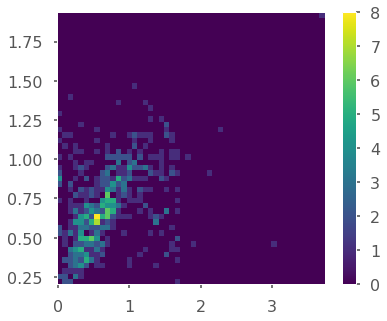

In [18]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train, sample_weight=weights_train)
y_pred = regressor.predict(X_test)
plt.figure(figsize=(6,5))
plt.hist2d(y_test, y_pred, bins=(50,50))
plt.colorbar()
plt.show()

In [8]:
weights = cat.compute_weights(df_matched, column = 'MAG_AUTO_R')

In [19]:
ML = LearningAlgorithms(survey = 'ps3pi_cfis', bands = bands, dataframe= df_matched, output_name = output_name, output_path=output_path, sample_weight=weights, n_jobs=1)
                
weight_train = ML.weight_train()
print(weight_train)

[0.00050401 0.00049366 0.00045067 ... 0.00025559 0.00036229 0.0001688 ]
[0.00022135 0.00039732 0.0003384  ... 0.0004013  0.000465   0.00020304]
[0.00022135 0.00039732 0.0003384  ... 0.0004013  0.000465   0.00020304]
